In [1]:
import torch
import  numpy as np
from matplotlib import pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
import math


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)


cuda:0


In [3]:
lud1 = [0.0031379359374090754, 0.02088917427542558, 0.025657093190956104, 0.07807205497606517, 0.07909690682196224, 0.0892386974659658, 0.0946706879722532, 0.10320004912412806, 0.11856695526134153, 0.1419291571382102, 0.1545897217058032, 0.15548080916224993, 0.16423881308485733, 0.20595056113192722, 0.20991458876328561, 0.21247651865230033, 0.23416099999560824, 0.23520874102590117, 0.25572077452491815, 0.2603834116414552, 0.2639425706210732, 0.2825848258144221, 0.30546945053049157, 0.3166164133222358, 0.31897726994714226, 0.3436433989537928, 0.35055274055780306, 0.3690750609480844, 0.3857273197716431, 0.3895847729330164, 0.4088729303373855, 0.4124388176002274, 0.4284371145354351, 0.452736866740687, 0.46038236992590864, 0.496335408562544, 0.5071574488974173, 0.5120395285560546, 0.5363042443177415, 0.568399554057164, 0.5961334783569683, 0.6163233913575397, 0.6244376676308843, 0.6256965699423924, 0.6430826380152492, 0.646861681937902, 0.676925965823556, 0.7089576730141003, 0.7190856230420746, 0.7318892963605252, 0.7477689380797123, 0.7622636111762038, 0.7859357034071914, 0.7945515380442094, 0.8012256265102096, 0.8244830508315077, 0.8448069852066347, 0.8527594725465555, 0.857389268633149, 0.888830198049086, 0.9348947968992967, 0.9401537236507664, 0.9494444493859113, 0.9545419165126683, 0.9716011473506727, 0.9917655464523518, 1.0153998009030731, 1.0360222472520677, 1.0771963828106825, 1.089750637899149, 1.130025816971993, 1.1329096689696447, 1.1332065538934764, 1.1558969317010996, 1.1844138525044796, 1.1884984079697434, 1.1951582404565677, 1.203197022865166, 1.2043405159454172, 1.223192210356423, 1.2319906855900262, 1.243437903486158, 1.2463058764075745, 1.249624466636563, 1.2805529199538226, 1.311463537061341, 1.3310488654505592, 1.3653555493116327, 1.3670485080766728, 1.3695928507493722, 1.393805696970026, 1.4058224308076257, 1.4159641974619124, 1.4205877959885926, 1.434716415343555, 1.4429382819513838, 1.4509327295190078, 1.457093275897079, 1.5321532277927892, 1.5628107812567205, 1.5698990675843696, 1.5750948519515662, 1.5874064384347184, 1.5982641328843377, 1.6069274824602378, 1.6331697457066827, 1.654887768269238, 1.686451211795669, 1.6889249941564124, 1.728143550343547, 1.7423753796280081, 1.7485780901338952, 1.7505702273285682, 1.770112965526823, 1.8272722366739984, 1.828614386992144, 1.8395781352222356, 1.875181757446419, 1.8769768249609413, 1.8843092127895602, 1.8913824265312593, 1.8919887223583975, 1.8936184918765067, 1.9026065357137245, 1.941726350465319, 1.9651435131799833, 1.9651665999260182, 1.9788861264060849, 1.9810411743655, 1.9988638231184472, 2.007460016789193, 2.016273298526457, 2.0204018205498535, 2.0209741937309476, 2.0421553712580236, 2.0658558090533203, 2.070320465380921, 2.0856963343259824, 2.12460314467055, 2.1283778218354072, 2.1336717214340553, 2.1505598479980916, 2.156064687560801, 2.164786891196945, 2.1900988924172777, 2.2028405816359795, 2.2180623717311647, 2.256295671253368, 2.28747614469658, 2.30728418628037, 2.3230383526618823, 2.3339604752654415, 2.3443788816111653, 2.34951365459074, 2.356543107360971, 2.3918427947089596, 2.4343344131484352, 2.4355607360719453, 2.4362860249957903, 2.4512966759379395, 2.4647604732002097, 2.4669539162462844, 2.4944370946773535, 2.4984801888611, 2.5126502465969516, 2.5159055780208552, 2.5207964182931564, 2.5509625173233976, 2.5622697632406393, 2.580745219245716, 2.6130926115375255, 2.6133754454763123, 2.6235547281304203, 2.626079609199439, 2.6504559508032637, 2.661415577448346, 2.6622516091646258, 2.682592328398898, 2.6838064097204093, 2.7030262427589546, 2.7106344144855505, 2.720277594413937, 2.7333126694271, 2.748191957205239, 2.7558747906569145, 2.7576152822560607, 2.764155346712397, 2.7745326526309473, 2.7759903529631673, 2.776081383909732, 2.7799102030112834, 2.7832417626243293, 2.7998007819882895, 2.8011257074286897, 2.817263291103565, 2.8199830780809725, 2.8238265162356946, 2.831292152499114, 2.833685749338664, 2.848567038756915, 2.8766487803560548, 2.8857013460621896, 2.8960602217823723, 2.904176302416607, 2.9285220156808283, 2.9361209144920446, 2.9378968562169643, 2.940298043240494, 2.9453417329678535, 2.949939618733949, 2.9573469106336283, 2.9593600709696464, 2.9607669514779946, 2.9915563281108932, 3.0072251480649443, 3.016093971624901, 3.018477543338663, 3.021964702556483, 3.026599497225944, 3.0645156918869034, 3.081956475105457, 3.1196929764928996, 3.122919207789618, 3.1337910994862446, 3.1408902784000228, 3.1606943772581495, 3.163547351996364, 3.1951199356576065, 3.2002721501151736, 3.2019635090568466, 3.212306480308831, 3.2168614851577813, 3.246402156026594, 3.251435141337664, 3.2523631724188675, 3.2632075694590785, 3.275835764821987, 3.293507425075772, 3.294435947462521, 3.298499909639366, 3.3053177882522755, 3.3165925060549766, 3.336789635701245, 3.3418986417693537, 3.372965307904817, 3.3740012990592136, 3.376023888713614, 3.417133782546239, 3.420268560318977, 3.4239720888289256, 3.4434572039236384, 3.4642111033956544, 3.4666979269181697, 3.491172034377712, 3.500242146034121, 3.5018382863127435, 3.5099808305231566, 3.5212400691167858, 3.5421343592213583, 3.547485069282426, 3.5580623775642444, 3.563026652237186, 3.5663081277412223, 3.568849732824188, 3.575605863257022, 3.580376515450383, 3.5821915256413117, 3.589154998607051, 3.6075364742936378, 3.6135431174905976, 3.6176288358875617, 3.646031146118802, 3.6908844491220645, 3.6937390950626714, 3.699644725453709, 3.7046366856865296, 3.708681668900435, 3.7132935279130557, 3.7287030450859877, 3.7356113919096545, 3.75390840918248, 3.755763119402971, 3.756376463480069, 3.7599232936309823, 3.7723371853163883, 3.7739688381288925, 3.78491005090964, 3.7916403994224854, 3.792992384141197, 3.8210290363518578, 3.8462367502789894, 3.8566731272630213, 3.858969948241313, 3.8995672570008715, 3.9086265295158427, 3.9162841357066647, 3.9209136434753553, 3.936581727938714, 3.950016204686592, 3.978670692797704, 3.9868900184394525, 3.9956467895224987, 4.026202744160896, 4.028114392864281, 4.039985703494226, 4.070029472684543, 4.071750301002254, 4.092723874928886, 4.096183040065874, 4.105344543621854, 4.109611289085496, 4.113481361567114, 4.160472785517677, 4.162776295546589, 4.164730638326163, 4.2327737571252415, 4.245053185714201, 4.2690932049295505, 4.281706836341496, 4.2848493231019305, 4.292846316986506, 4.317507298404031, 4.3205226819881295, 4.325441581185859, 4.33217120098748, 4.335123393766651, 4.346934108504614, 4.353934942836458, 4.35657952765017, 4.358309631583229, 4.3648371027938175, 4.381986493613388, 4.384443168112388, 4.386557557255031, 4.400986102934242, 4.419856987399703, 4.42982993184487, 4.4321086449902145, 4.459766434794151, 4.469521410812019, 4.471655241705456, 4.4944314538954675, 4.524029620940447, 4.535160108457681, 4.552951593279196, 4.557354398193978, 4.561412701642426, 4.5800950579152, 4.584968349391543, 4.605172019195811, 4.6055468975766845, 4.6136333506103036, 4.618634318890872, 4.624413088280443, 4.658664851594854, 4.661325194260994, 4.671475216406315, 4.690031841489011, 4.70501582589192, 4.708388781308942, 4.716166532344451, 4.716328064103534, 4.741207066682279, 4.746637168802948, 4.789109017259856, 4.789585062033816, 4.790063012169581, 4.791181720010742, 4.800556611031377, 4.802097024245652, 4.8066696357503975, 4.818912047142889, 4.81920210536991, 4.821844875138987, 4.82794423676073, 4.828308539075266, 4.843078487078493, 4.844149593721218, 4.851078990883996, 4.852938955851328, 4.865238458268348, 4.884967819596593, 4.885810251497948, 4.896275764928944, 4.937468888788952, 4.941389169776019, 4.95438903231888, 4.9735155226987775, 4.979553346982437, 4.993173925784258, 4.997178869347533, 5.001412701137829, 5.004643903876525, 5.004729112737282, 5.005050189630019, 5.0066534896866015, 5.012030830415303, 5.020590254508525, 5.023607650417948, 5.038770204624307, 5.060859747207887, 5.078695456605379, 5.095117934908146, 5.09704946551822, 5.101218317820935, 5.125621254241285, 5.127672061048768, 5.128157011977255, 5.13079867028127, 5.133184545941934, 5.133399658430679, 5.144088472897628, 5.157451631383463, 5.1876359491139326, 5.195022762182232, 5.20970156450504, 5.212731737160314, 5.214571981559323, 5.214793773701554, 5.216935317809098, 5.22011956361214, 5.2263026007709446, 5.231935241656975, 5.238027401792807, 5.245808994604391, 5.2463706945731925, 5.252175243001089, 5.259909643473855, 5.2605804514481, 5.28312385486582, 5.283753042750405, 5.2885251824448405, 5.2970185895704285, 5.318260857248554, 5.32615363191925, 5.3273089841886785, 5.33187317973565, 5.363605181926641, 5.365291283375446, 5.377003466742067, 5.386220851668197, 5.3994980312782905, 5.414729380310616, 5.424858412820543, 5.444641090049759, 5.445497591469509, 5.4507162491415535, 5.474110455454182, 5.479430131592666, 5.500424900006117, 5.501253935377038, 5.51588498703974, 5.527776828709138, 5.541135846970903, 5.549924222237206, 5.562039002833739, 5.572989297473538, 5.615902118941336, 5.630307172850167, 5.664436283949173, 5.6662433247802895, 5.667119202273453, 5.67129729050038, 5.711422709663378, 5.7149934282687935, 5.716432749784204, 5.719926062333322, 5.721772247906886, 5.739365683543468, 5.741740978009636, 5.744769741190264, 5.745218026489934, 5.747183188386902, 5.755606716772909, 5.774765470576979, 5.78989759247422, 5.799144339119083, 5.803823902582001, 5.8101289089833195, 5.834256121885145, 5.840260067906913, 5.869897310016287, 5.879243442300919, 5.887287929306073, 5.89114028915055, 5.899759744913311, 5.90267624171154, 5.9089300415564, 5.916745830913734, 5.931736497414435, 5.9547737197882835, 5.955078582545442, 5.959275327717889, 5.967399163620261, 5.968489953506967, 5.985448957511901, 5.9892058372141825, 6.0058294505414995, 6.027151685180572, 6.030533628377496, 6.033618934137073, 6.035998881999664, 6.049910439416307, 6.081691522591294, 6.082278976212056, 6.083422504979525, 6.086330749948878, 6.094153823122048, 6.103745035403057, 6.108378256611261, 6.109508343694, 6.114893751919703, 6.122752547774608, 6.13934710114814, 6.167083852757494, 6.187286076339076, 6.189969674906159, 6.1939300840373805, 6.212335089246079, 6.248680968902517, 6.264812641154958, 6.275544192629272, 6.289277419712188, 6.3004069445651085, 6.333844581711045, 6.337364428529899, 6.3446051547771205, 6.3510291058340576, 6.357135937280517, 6.365918278112694, 6.3714495052515305, 6.3718073604084084, 6.384389208103184, 6.390866324530172, 6.401018649323219, 6.406246963411977, 6.407787908617704, 6.410920811795163, 6.42851104237189, 6.435443849339276, 6.465622487880592, 6.475088596682134, 6.48615577038494, 6.501897177604493, 6.535884678017308, 6.5604842445988325, 6.561501846559952, 6.585993635545489, 6.590549172395853, 6.618435390835597, 6.639322275533396, 6.644636624879289, 6.663997149953224, 6.665203003679725, 6.665797223039482, 6.675455815801785, 6.685526743210671, 6.701397014632787, 6.708970239607906, 6.712618072323422, 6.7293728681555045, 6.745837379851227, 6.77743645905561, 6.79073536969626, 6.812067035718452, 6.830548623797609, 6.847301912858504, 6.8674478352961925, 6.868725902236014, 6.892208934756877, 6.8923913722751164, 6.904266517183143, 6.92388945765866, 6.9386957092113795, 6.947388540603159, 6.951623446802938, 6.962296959588547, 6.984712601406311, 6.996292053539107, 6.9964898039208006, 7.009111050016696, 7.057837511224414, 7.065177703242, 7.078110700645694, 7.086654008650388, 7.116505053818543, 7.121838432231534, 7.183314723296031, 7.192980059757746, 7.2030906588250705, 7.209415884926978, 7.215952902339385, 7.2318033905610095, 7.235197521075209, 7.238812951497271, 7.245280242443595, 7.277878587599209, 7.281531398170234, 7.291219114605689, 7.293638222054243, 7.293988776745886, 7.31192904945499, 7.320849982778741, 7.33052813983069, 7.371098851205866, 7.42460724796188, 7.482935835323583, 7.494835356369995, 7.513796509899397, 7.53125218523947, 7.535584790391461, 7.535835552309534, 7.5402824365166286, 7.549770795113114, 7.55380903722579, 7.554309073201594, 7.579143983196388, 7.58323210779508, 7.585807543473251, 7.586116654397628, 7.606786919685639, 7.608031054195518, 7.614040947935275, 7.640619424507588, 7.6495458053275085, 7.652093125895035, 7.657276450162202, 7.659206981656886, 7.661973958337135, 7.669045827699541, 7.673493088631444, 7.680119528661802, 7.685231630412429, 7.709267697802216, 7.719608045259576, 7.735947619635592, 7.7448512877852025, 7.769263948689613, 7.790839306021803, 7.813038361957063, 7.823173853273969, 7.834605090266642, 7.84314487537907, 7.846029657666519, 7.847063459065139, 7.85416259896994, 7.872042577986623, 7.883972952129838, 7.9067545418548, 7.916664013388431, 7.943194718750167, 7.9578980944681765, 7.9633258269030325, 7.96508146093163, 7.96825599654037, 8.010603547493773, 8.011497693780754, 8.015499803668952, 8.015778141961334, 8.021682827019793, 8.029449474472795, 8.055607865754256, 8.067031544864651, 8.080340348574797, 8.11306682645559, 8.118394668879544, 8.118762663132237, 8.151163220117668, 8.16060300677707, 8.179452255768968, 8.183670217003547, 8.193691597713093, 8.20181901443839, 8.207406260660065, 8.20908886047312, 8.220729314738628, 8.222839176040615, 8.244052454404542, 8.295413628303274, 8.321584602165984, 8.33690101243565, 8.373930203567312, 8.37609723221233, 8.380132977209483, 8.386078862212102, 8.388951610754926, 8.393196035655748, 8.398930065246358, 8.40773269729359, 8.416429008117039, 8.421915167300652, 8.440197158551886, 8.440560712216863, 8.461178582681438, 8.471062172749857, 8.481028525400443, 8.498774651720082, 8.498983803259382, 8.505649960459074, 8.511150189924235, 8.55027648334833, 8.551761571116922, 8.575436538861716, 8.587650796121284, 8.6093101856283, 8.61096584118532, 8.618539913292333, 8.64581885482791, 8.64688012865167, 8.673949124688992, 8.676087313587862, 8.696106254071138, 8.70212204581689, 8.703041673479415, 8.730518708580245, 8.737180263969542, 8.745613128790453, 8.761994130248757, 8.776617971714309, 8.784792970961472, 8.797469472983435, 8.817365709693872, 8.825772101000206, 8.835065991680683, 8.83980414764737, 8.851453125654443, 8.853649385686053, 8.889536678121765, 8.895743535029009, 8.902475089199143, 8.907211244073496, 8.908937612432904, 8.929831326297368, 8.938788371163076, 8.944287792827648, 8.957426870485952, 8.961796438775528, 8.964120790769083, 8.965499585971763, 8.970363945995384, 8.972111606971474, 8.979912808756081, 9.000173732663065, 9.007999369372289, 9.021438192385896, 9.059401731786835, 9.060123395152697, 9.079919396675246, 9.081926284189796, 9.08354011407696, 9.162105885235972, 9.186004310344146, 9.193140344454974, 9.215951845433409, 9.221789451750986, 9.222778516764649, 9.22430060210294, 9.250534798879926, 9.284102634239012, 9.30826053491656, 9.318409522407265, 9.336761830351293, 9.3418177105612, 9.347337956097412, 9.350684017543077, 9.361810870570732, 9.364048944410438, 9.368249657469502, 9.375514618925962, 9.403811777335504, 9.423869065394177, 9.442030278102486, 9.46581059301027, 9.47500787104192, 9.479130945525691, 9.52453490967283, 9.536960326267334, 9.537321196233302, 9.543536994327141, 9.561943212248362, 9.570441783357829, 9.579253925619788, 9.579585167305106, 9.587811352066517, 9.592478872546613, 9.613974924502768, 9.626458720612892, 9.646534613987699, 9.665115809476077, 9.687200173750927, 9.697240973459067, 9.721912120540964, 9.724764884695308, 9.755213624394287, 9.774906029911811, 9.798102814654207, 9.802264438204608, 9.80528348749976, 9.807433047931216, 9.813108871502799, 9.81961523405796, 9.828092383897559, 9.831867428404985, 9.838511341553598, 9.850675294753099, 9.853752012914175, 9.858580777439766, 9.86554695649227, 9.898497108972894, 9.898791861529034, 9.900348539092054, 9.917617546935638, 9.920951028886384, 9.946707063834538, 9.952979012974136, 9.953815652574406, 9.960001494808017, 9.98476200798483, 10.007144141951535, 10.038492365700861, 10.057507814867485, 10.06471671538973, 10.081224884883436, 10.086273251056571, 10.093354104244032, 10.094138612005345, 10.095102750813176, 10.108367341129542, 10.13348247251438, 10.16660034942895, 10.169700135776635, 10.280314642379526, 10.281722537465559, 10.299465247889582, 10.308327823614064, 10.332196719137613, 10.332777937407977, 10.345303829140388, 10.370392798885113, 10.377991062791672, 10.392157847384386, 10.393600930202178, 10.39479329261313, 10.402792173297748, 10.415194217756401, 10.426138100477925, 10.430915267357076, 10.439455933833253, 10.45265418340361, 10.4548510825561, 10.472896936308299, 10.504076557021897, 10.507814322992965, 10.509389254947202, 10.513717545105337, 10.516599974867638, 10.54919922195127, 10.60261445571296, 10.605303819811763, 10.611774261999528, 10.611828536741935, 10.626106664557431, 10.663221622139385, 10.66534916840044, 10.677180568038034, 10.684499577492225, 10.739078226990127, 10.741977434114151, 10.747777457296433, 10.75585000837621, 10.801620765260296, 10.808561141264814, 10.810559562014273, 10.83890910115374, 10.840111943700204, 10.882188624201776, 10.889260049156512, 10.932158062232775, 10.944250440641062, 10.944513557329445, 10.984665882900693, 11.018282773597878, 11.047997077276523, 11.049102758344784, 11.055247241088878, 11.070027482738254, 11.087428880474484, 11.092932573304942, 11.133578524433663, 11.137053486855049, 11.153390324762015, 11.16315988555144, 11.167022026055626, 11.179038700718593, 11.180700527312567, 11.194489254938453, 11.198832022670391, 11.200807737222055, 11.222225886923887, 11.251609405870557, 11.258242330688171, 11.281020169775541, 11.297155951079588, 11.298821844190897, 11.378296561973375, 11.400993774828718, 11.404587866238515, 11.409800706509158, 11.41118065689952, 11.466038148075443, 11.498298230166544, 11.501430044152656, 11.516649401556972, 11.517130240262937, 11.518512285689358, 11.52028154576006, 11.52820611761581, 11.538450776495358, 11.561540655577431, 11.60238100017067, 11.612617862862878, 11.617324571944945, 11.63818974339223, 11.686700344815723, 11.693361100757992, 11.701158534820548, 11.714289645706504, 11.723887428261381, 11.7252158351097, 11.732672080896432, 11.735172051665284, 11.737564833615046, 11.749174709833754, 11.7528396410062, 11.755712329338088, 11.774179115524277, 11.842074103013463, 11.887083989046115, 11.893684945523763, 11.914321301160573, 11.926887603128389, 11.947125885012595, 11.949244411277757, 11.987455244286394, 12.033720014587288, 12.07497757636353, 12.17150892197839, 12.218323945417989, 12.229391843971065, 12.234716035384823, 12.282204663022155, 12.312442536491316, 12.327738769509786, 12.328038730275761, 12.401537779741517, 12.451267688265201, 12.475383902462662, 12.482640416744315, 12.483033703169768, 12.505928215076683, 12.534491355107846, 12.564724144927911, 12.601084558122821, 12.615918272006947, 12.61737503127922, 12.627428426219774, 12.6432760298752, 12.685594028713087, 12.690584290034167, 12.7471966681758, 12.771777899656112, 12.784983829871953, 12.801543777022209, 12.8482293899256, 12.866235181482448, 12.900728747525832, 12.952880033370217, 12.974140889224039, 13.062623972765376, 13.064710769208943, 13.075129813417197, 13.0858143298072, 13.170187796302447, 13.172895602748653, 13.195445711567, 13.218282531225425, 13.228206847980982, 13.238992247558112, 13.256156944613508, 13.277077162278081, 13.27983597707215, 13.330523570696943, 13.41307669412241, 13.480625670254117, 13.53977220152926, 13.550787913879168, 13.56185966459778, 13.569564142105216, 13.641442004133534, 13.646504029271501, 13.64652001373014, 13.655572217901161, 13.694808349847941, 13.728288233981264, 13.733856859025334, 13.764694606485012, 13.829299450637329, 13.835191953123495, 13.845110850693867, 13.947926479731073, 13.953422242044184, 13.994251771576437, 14.01128059453873, 14.036756961886073, 14.059859092356191, 14.190554384909596, 14.235074355355295, 14.252326668689495, 14.270621500387286, 14.32699570268133, 14.401724173307649, 14.406852074879268, 14.46110219397563, 14.553429781241894, 14.712374033839724, 14.793774048990347, 14.851420217002328, 14.868562894859547, 14.894481964515501, 14.976297555790698, 15.047677927693044, 15.081540349528073, 15.097412143775998, 15.159002858704131, 15.17908484138022, 15.19511089014243, 15.406374712690328, 15.862369132946242, 15.954895236967605, 16.21347497619184, 16.537870032250424, 16.634642720761093, 16.670067503976053, 16.75223617293806, 16.89760839115756, 17.04980457010926, 18.45339117405085, 18.792877603989535, 19.456341977802758, 19.57540236546342, 19.753490997359542, 19.819781899569797, 19.877089809527885, 19.895838847874423, 19.972212199908927, 20.518908503469863, 20.57094364452027, 20.631210556433185, 20.78685795256437, 20.81108369563389, 20.86672550826544, 20.904614277126804, 20.919966575580457, 20.942195497500766, 20.985484767774082, 20.993467538551993, 21.194170164956443, 21.264644056839185, 21.271631032256458, 21.296699432052083, 21.311644782710637, 21.381052172631115, 21.38878347692137, 21.397850729864064, 21.413501196485903, 21.46221229249821, 21.547229461615068, 21.642171942751098, 21.6441781168007, 21.739163411825974, 21.74500540532411, 21.82468612962229, 21.840431081629532, 21.85241230338977, 21.865812535862922, 21.905397109657436, 21.906671813190297, 21.914418791533585, 21.915701947547507, 22.0073413872259, 22.014398176295373, 22.034948353833528, 22.06665719124105, 22.098991024766264, 22.238206300323814, 22.295477339615335, 22.316723000155147, 22.422424756949543, 22.438307301169583, 22.563783936385718, 22.56782297988924, 22.64473664549793, 22.756597454206627, 22.76616132970468, 22.792206324357558, 22.79609296823236, 22.83911811651505, 22.83914042086089, 22.876062658883107, 22.893177680817846, 22.96176430500176, 22.98004102537783, 23.00401168715203, 23.05579292327481, 23.07880214663151, 23.103567091530714, 23.112610006713673, 23.112680685138468, 23.118708360699006, 23.21615703010294, 23.24415264410832, 23.259928396105884, 23.30698612617224, 23.364329599781843, 23.387196747994018, 23.391985383142863, 23.403135764632577, 23.421361114659955, 23.434021523598403, 23.45230772876367, 23.51482444903746, 23.55165470187861, 23.564405222205348, 23.570125288347363, 23.577080847955006, 23.60208651511138, 23.61538438653649, 23.63227039547261, 23.64982972525288, 23.679233158240436, 23.715979900025342, 23.719820183326885, 23.731425913765882, 23.734672413547585, 23.77135747404396, 23.776900899201184, 23.812550779898704, 23.83595196025602, 23.865834554384744, 23.91112358097027, 23.950370095973497, 23.961565967055854, 23.968215905475883, 23.974184913463283]

In [4]:
# 创建训练数据
def GeneratePoissonSample(a,b):
    N = np.random.poisson(1000*(b-a), 1)
    X = np.random.uniform(a, b, N)
    Y = np.random.uniform(0, 2, N)
    return (sorted(X[(Y <= np.sin(2*math.pi*(X-a)/(b-a))+1)]))
a = 0
b = 24
lud1 = GeneratePoissonSample(a, b)
t = np.linspace(a, b, 100)
_lambda_ = 50 * (np.sin(2*math.pi*(t-a)/(b-a))+1)
print(len(lud1))


12039


tensor([[ 0.0000],
        [ 0.2424],
        [ 0.4848],
        [ 0.7273],
        [ 0.9697],
        [ 1.2121],
        [ 1.4545],
        [ 1.6970],
        [ 1.9394],
        [ 2.1818],
        [ 2.4242],
        [ 2.6667],
        [ 2.9091],
        [ 3.1515],
        [ 3.3939],
        [ 3.6364],
        [ 3.8788],
        [ 4.1212],
        [ 4.3636],
        [ 4.6061],
        [ 4.8485],
        [ 5.0909],
        [ 5.3333],
        [ 5.5758],
        [ 5.8182],
        [ 6.0606],
        [ 6.3030],
        [ 6.5455],
        [ 6.7879],
        [ 7.0303],
        [ 7.2727],
        [ 7.5152],
        [ 7.7576],
        [ 8.0000],
        [ 8.2424],
        [ 8.4848],
        [ 8.7273],
        [ 8.9697],
        [ 9.2121],
        [ 9.4545],
        [ 9.6970],
        [ 9.9394],
        [10.1818],
        [10.4242],
        [10.6667],
        [10.9091],
        [11.1515],
        [11.3939],
        [11.6364],
        [11.8788],
        [12.1212],
        [12.3636],
        [12.

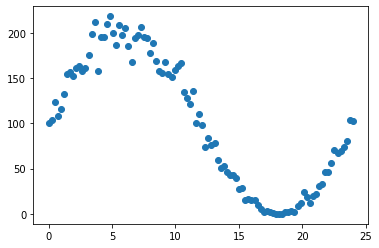

In [5]:
def IntervalCount(Lud1,n,a,b): 
    Lud2 = np.zeros(n)
    if (n==1):
        Lud2[0] = len(Lud1)
    else:
        for i in range(n):
            lower = a + i*(b-a)/n
            upper = lower + (b-a)/n
            for j in range(len(Lud1)):
                if((Lud1[j]>=lower)&(Lud1[j]<upper)):
                    Lud2[i]=Lud2[i]+1
    
    return(Lud2)
lud2 = IntervalCount(lud1,100,a,b)
x1, x2, x3 = t, t**2, t**3
x = np.array([x1],dtype=np.float32).T
x = torch.from_numpy(x)
print(x)
y = np.array([(lud2 * 20)/(b-a)],np.float32).T
plt.scatter(t,y)
y = torch.from_numpy(y)
print(y)
print(x.shape)

In [6]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.features1 = nn.Linear(1, 10)
        self.features2 = nn.Linear(10,10)
        self.features3 = nn.Linear(10,10)
        self.features4 = nn.Linear(10,1)
        
        
        

    def forward(self, x):
        x = F.relu(self.features1(x))
        x = F.relu(self.features2(x))
        x = F.relu(self.features3(x))
        x = self.features4(x)
        return x

lr_net = LR()
lr_net.to(device)

LR(
  (features1): Linear(in_features=1, out_features=10, bias=True)
  (features2): Linear(in_features=10, out_features=10, bias=True)
  (features3): Linear(in_features=10, out_features=10, bias=True)
  (features4): Linear(in_features=10, out_features=1, bias=True)
)

In [9]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(lr_net.parameters(), lr=0.01)

In [10]:
epoch = 0
while True:
    output = lr_net(x.to(device))  # 前向传播
    loss = criterion(output.to(device), y.to(device))  # 损失计算
    loss_value = loss.data  # 获取损失值
    optimizer.zero_grad()  # 梯度置零
    loss.backward()  # 反向传播
    optimizer.step()  # 更新梯度
    
    
    epoch += 1
    if epoch % 10000 == 0:  # 每100步打印一次损失
        print('Epoch:{}, loss:{:.6f}'.format(epoch, loss_value))
    if loss_value <= 1:
        break
        

Epoch:10000, loss:88.647469
Epoch:20000, loss:87.546463
Epoch:30000, loss:87.342735
Epoch:40000, loss:87.332176
Epoch:50000, loss:87.369331
Epoch:60000, loss:88.059128
Epoch:70000, loss:87.128738
Epoch:80000, loss:87.815758
Epoch:90000, loss:86.999908
Epoch:100000, loss:87.445328
Epoch:110000, loss:87.000473
Epoch:120000, loss:87.217323


KeyboardInterrupt: 

In [1]:
conda install pytorch torchvision torchaudio cudatoolkit=11.0 -c pytorch

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\24253\anaconda3

  added / updated specs:
    - cudatoolkit=11.0
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-11.0.3         |       h3f58a73_6       942.6 MB  http://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge
    libuv-1.40.0               |       he774522_0         255 KB  http://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
    ninja-1.7.2                |                0         1.8 MB  http://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free
    pytorch-1.7.0              |py3.8_cuda110_cudnn8_0      1003.4 MB  pytorch
    torchaudio-0.7.0           |             py38         2.7 MB  pytorch
    torchvision-0.8.1          |       py38_cu110         7.2 MB  pytorch
    --------------------------------------------

pytorch-1.7.0        | 1003.4 MB | ####7      |  48% 
pytorch-1.7.0        | 1003.4 MB | ####7      |  48% 
pytorch-1.7.0        | 1003.4 MB | ####8      |  48% 
pytorch-1.7.0        | 1003.4 MB | ####8      |  48% 
pytorch-1.7.0        | 1003.4 MB | ####8      |  48% 
pytorch-1.7.0        | 1003.4 MB | ####8      |  48% 
pytorch-1.7.0        | 1003.4 MB | ####8      |  49% 
pytorch-1.7.0        | 1003.4 MB | ####8      |  49% 
pytorch-1.7.0        | 1003.4 MB | ####8      |  49% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  49% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  49% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  49% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  49% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  50% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  50% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  50% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  50% 
pytorch-1.7.0        | 1003.4 MB | ####9      |  50% 
pytorch-1.7.0        | 1003.

pytorch-1.7.0        | 1003.4 MB | #####8     |  58% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  58% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  58% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  58% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.4 MB | #####8     |  59% 
pytorch-1.7.0        | 1003.

pytorch-1.7.0        | 1003.4 MB | ######4    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######4    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######4    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  65% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  66% 
pytorch-1.7.0        | 1003.4 MB | ######5    |  66% 
pytorch-1.7.0        | 1003.

pytorch-1.7.0        | 1003.4 MB | #########5 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########5 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########5 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########5 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########5 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########5 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########5 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.4 MB | #########6 |  96% 
pytorch-1.7.0        | 1003.

cudatoolkit-11.0.3   | 942.6 MB  | ########   |  80% 
cudatoolkit-11.0.3   | 942.6 MB  | ########   |  81% 
cudatoolkit-11.0.3   | 942.6 MB  | ########1  |  81% 
cudatoolkit-11.0.3   | 942.6 MB  | ########1  |  81% 
cudatoolkit-11.0.3   | 942.6 MB  | ########1  |  82% 
cudatoolkit-11.0.3   | 942.6 MB  | ########1  |  82% 
cudatoolkit-11.0.3   | 942.6 MB  | ########2  |  82% 
cudatoolkit-11.0.3   | 942.6 MB  | ########2  |  83% 
cudatoolkit-11.0.3   | 942.6 MB  | ########2  |  83% 
cudatoolkit-11.0.3   | 942.6 MB  | ########3  |  83% 
cudatoolkit-11.0.3   | 942.6 MB  | ########3  |  83% 
cudatoolkit-11.0.3   | 942.6 MB  | ########3  |  84% 
cudatoolkit-11.0.3   | 942.6 MB  | ########4  |  84% 
cudatoolkit-11.0.3   | 942.6 MB  | ########4  |  84% 
cudatoolkit-11.0.3   | 942.6 MB  | ########4  |  85% 
cudatoolkit-11.0.3   | 942.6 MB  | ########4  |  85% 
cudatoolkit-11.0.3   | 942.6 MB  | ########5  |  85% 
cudatoolkit-11.0.3   | 942.6 MB  | ########5  |  85% 
cudatoolkit-11.0.3   | 942.6

In [187]:
for name,parameters in lr_net.named_parameters():
    print(name,";",parameters)

features1.weight ; Parameter containing:
tensor([[-0.1987],
        [ 0.9692],
        [-0.3622],
        [ 0.0485],
        [ 0.2119],
        [ 0.7322],
        [ 0.0687],
        [-0.4944],
        [ 0.8599],
        [-0.2824]], requires_grad=True)
features1.bias ; Parameter containing:
tensor([ 0.5262, -0.7954, -0.0416, -0.4652,  0.9960, -0.4838,  0.0171, -0.0911,
        -0.6783,  0.5004], requires_grad=True)
features2.weight ; Parameter containing:
tensor([[ 0.4369, -0.1646, -0.0214, -0.3239,  0.4672, -0.0798, -0.0932, -0.3432,
          0.0345,  0.0911]], requires_grad=True)
features2.bias ; Parameter containing:
tensor([0.3246], requires_grad=True)
